<h1>Group Project<h1> 
<h4>Team 9<h4>

In [ ]:
# Imports
import yfinance as yf
from datetime import date
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import random
import statistics

###Backtest From TQQ's Inception

Inherently baised to backtest from inception. Think if you were to have bought Apple when it went public, you would also have crazy gains. 

In [ ]:
#DATA DICT
tqqq = yf.Ticker("TQQQ")
# get stock info
print(tqqq.info)
# get historical market data
hist = tqqq.history(period="5d")
print(hist)

{'longBusinessSummary': "The fund invests in financial instruments that ProShare Advisors believes, in combination, should produce daily returns consistent with the fund's investment objective. The index includes 100 of the largest domestic and international non-financial companies listed on The Nasdaq Stock Market based on market capitalization. The fund is non-diversified.", 'maxAge': 86400, 'priceHint': 2, 'previousClose': 28.25, 'open': 28.14, 'dayLow': 27.875, 'dayHigh': 28.53, 'regularMarketPreviousClose': 28.25, 'regularMarketOpen': 28.14, 'regularMarketDayLow': 27.875, 'regularMarketDayHigh': 28.53, 'volume': 88445697, 'regularMarketVolume': 88445697, 'averageVolume': 163102815, 'averageVolume10days': 117129900, 'averageDailyVolume10Day': 117129900, 'bid': 28.03, 'ask': 28.04, 'bidSize': 1300, 'askSize': 1100, 'yield': 0.0088, 'totalAssets': 14101613568, 'fiftyTwoWeekLow': 16.1, 'fiftyTwoWeekHigh': 42.45, 'fiftyDayAverage': 25.1076, 'twoHundredDayAverage': 24.33025, 'navPrice':

In [ ]:
# Downloading TQQQ and SPY day by day historical Adjusted closing price from TQQQ fund inception to current date
tickers = ['TQQQ', 'SPY', 'GLD', 'QQQ']
prices = yf.download(tickers, start='2010-02-11', end=date.today())['Close'] #may want to use['Adj Close'] ['Close'] to compinsate for TQQ's higher expense ratio. Or we can somehow add it back into the formula with an estimate?

# Save percentage change of tickers as a data frame
returns = prices.pct_change()
portfolio_returns = pd.DataFrame()

#See the individual performance of the ETF's  
portfolio_returns['TQQQ'] = returns['TQQQ']
portfolio_returns['SPY'] = returns['SPY']
portfolio_returns['QQQ'] = returns['QQQ']
portfolio_returns['GLD'] = returns['GLD']

#See the 50/50 TQQ and SPY Portfolio split rebalanced daily 
portfolio_returns['SPY_Split5050'] = returns['TQQQ'] * 0.5 + returns['SPY'] * 0.5

#50/50 TQQ GLD split rebalanced daily 
portfolio_returns['GLD_Split5050'] = returns['TQQQ'] * 0.5 + returns['GLD'] * 0.5

#65/35 TQQ GLD split rebalanced daily 
portfolio_returns['GLD_Split6040'] = returns['TQQQ'] * 0.6 + returns['GLD'] * 0.4

#80/20 TQQ GLD split rebalanced daily 
portfolio_returns['GLD_Split8020'] = returns['TQQQ'] * 0.8 + returns['GLD'] * 0.2  #Too high of a split and follows TQQQ to closely

#Calculating the cumulative returns of the portfolio over time
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

[*********************100%***********************]  4 of 4 completed


<ipython-input-4-259454532628>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


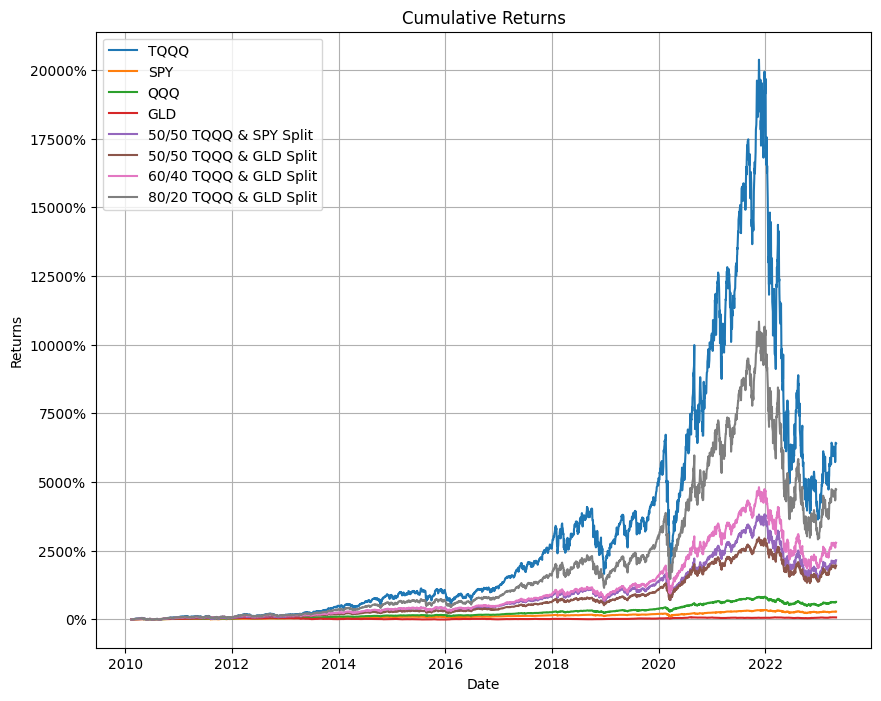

In [ ]:
# Graphing the Cumulative returns of the ETF's and splits in question
plt.figure(figsize=(10, 8))
plt.plot(cumulative_returns['TQQQ'], label='TQQQ')
plt.plot(cumulative_returns['SPY'], label='SPY')
plt.plot(cumulative_returns['QQQ'], label='QQQ')
plt.plot(cumulative_returns['GLD'], label='GLD')
plt.plot(cumulative_returns['SPY_Split5050'], label='50/50 TQQQ & SPY Split')
plt.plot(cumulative_returns['GLD_Split5050'], label='50/50 TQQQ & GLD Split')
plt.plot(cumulative_returns['GLD_Split6040'], label='60/40 TQQQ & GLD Split')
plt.plot(cumulative_returns['GLD_Split8020'], label='80/20 TQQQ & GLD Split')
plt.legend()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.grid(True)
plt.show()

In [ ]:
#Cumulative returns from 2010-02-11 to current date
cumulative_returns.iloc[-1,:]

TQQQ             64.125117
SPY               2.842690
QQQ               6.377834
GLD               0.717259
SPY_Split5050    21.545813
GLD_Split5050    19.609292
GLD_Split6040    27.902312
GLD_Split8020    47.378359
Name: 2023-05-01 00:00:00, dtype: float64

The values are essientaly a multiplier on your money if you were to have invested x amount on 2010-02-11 and never added or withdrawed any money. 

In [ ]:
# Getting the prices on the same price level so we can correctly calculate cagr(Essiently prices split portfolio start at the same price and then are free)
prices['SPY_adj'] = prices['SPY'] / prices['SPY'].iloc[0] * prices['TQQQ'].iloc[0]
prices['GLD_adj'] = prices['GLD'] / prices['GLD'].iloc[0] * prices['TQQQ'].iloc[0]

# Getting the prices for the portfolio splits
prices['SPY_Split5050'] = prices['TQQQ'] * 0.5 + prices['SPY_adj'] * 0.5
prices['GLD_Split5050'] = prices['TQQQ'] * 0.5 + prices['GLD_adj'] * 0.5
prices['GLD_Split6040'] = prices['TQQQ'] * 0.6 + prices['GLD_adj'] * 0.4
prices['GLD_Split8020'] = prices['TQQQ'] * 0.8 + prices['GLD_adj'] * 0.2

# total time for cagr
years = (prices.index[-1] - prices.index[0]).days / 365
prices_selected = prices[['TQQQ', 'SPY', 'GLD', 'SPY_Split5050', 'GLD_Split5050', 'GLD_Split6040', 'GLD_Split8020']]
#compound annual growth rate(cagr) formula
cagr = (prices_selected.iloc[-1, :] / prices_selected.iloc[0, :]) ** (1 / years) - 1
print(cagr.apply(lambda x: f'{x:.2%}'))

TQQQ             37.14%
SPY              10.72%
GLD               4.17%
SPY_Split5050    30.70%
GLD_Split5050    30.39%
GLD_Split6040    32.11%
GLD_Split8020    34.91%
dtype: object


**Somebody add notes here about cagr's.**

### Backtest From Worst Case Scenarios 

I'll pick a few dates that coincide with bear market's


1.   2021-11-19: TQQ's all time high 
2.   2020-02-14: Covid bear market rally
3.   2022-04-18: Year age from today, middle of a bear market






In [ ]:
# Grabbing the data from those 3 dates
df_ATH = cumulative_returns.loc['2021-11-19':]
df_COVID = cumulative_returns.loc['2020-02-14':]
df_1y = cumulative_returns.loc['2022-04-18':]
print(df_ATH)
print(df_COVID)
print(df_1y)

                  TQQQ       SPY       QQQ       GLD  SPY_Split5050  \
Date                                                                  
2021-11-19  203.761503  3.336355  8.250973  0.611220      38.193345   
2021-11-22  196.664091  3.324147  8.143577  0.575096      37.458920   
2021-11-23  193.970772  3.329881  8.101901  0.561467      37.222402   
2021-11-24  195.774020  3.341441  8.131212  0.559974      37.450183   
2021-11-26  184.919835  3.244613  7.958095  0.557454      35.960933   
...                ...       ...       ...       ...            ...   
2023-04-25   57.258892  2.755479  6.098466  0.733875      20.070482   
2023-04-26   58.229874  2.739573  6.141516  0.724447      20.201446   
2023-04-27   63.015425  2.814020  6.335700  0.724540      21.268984   
2023-04-28   64.310065  2.846574  6.386307  0.725007      21.589202   
2023-05-01   64.125117  2.842690  6.377834  0.717259      21.545813   

            GLD_Split5050  GLD_Split6040  GLD_Split8020  
Date              

In [ ]:
#Recalculating the cumulative returns from specific start date
dfs = [df_ATH, df_COVID, df_1y]
cumulative_returns_list = []
for df in dfs:
    returns = df.pct_change()
    portfolio_returns = pd.DataFrame()
    portfolio_returns['TQQQ'] = returns['TQQQ']
    portfolio_returns['SPY'] = returns['SPY']
    portfolio_returns['GLD'] = returns['GLD']
    portfolio_returns['SPY_Split5050'] = returns['TQQQ'] * 0.5 + returns['SPY'] * 0.5
    portfolio_returns['GLD_Split5050'] = returns['TQQQ'] * 0.5 + returns['GLD'] * 0.5
    portfolio_returns['GLD_Split6040'] = returns['TQQQ'] * 0.6 + returns['GLD'] * 0.4
    portfolio_returns['GLD_Split8020'] = returns['TQQQ'] * 0.8 + returns['GLD'] * 0.2
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1
    cumulative_returns_list.append(cumulative_returns) #cumulative_returns_list[0=df_ATH, 1=df_COVID, 2=df_1y]

In [ ]:
# Print out the cumulative returns if invested at the 3 dates to current
print("Cumulative Returns for TQQ's All Time High - Current Date")
print(cumulative_returns_list[0].iloc[-1,:])
print("----------------------------------------------")
print("Cumulative Returns for Start of Covid COVID - Current Date")
print(cumulative_returns_list[1].iloc[-1,:])
print("----------------------------------------------")
print("Cumulative Returns for a Year Ago - Current Date")
print(cumulative_returns_list[2].iloc[-1,:])

Cumulative Returns for TQQ's All Time High - Current Date
TQQQ            -0.685293
SPY             -0.147965
GLD              0.173488
SPY_Split5050   -0.446666
GLD_Split5050   -0.291831
GLD_Split6040   -0.382854
GLD_Split8020   -0.548259
Name: 2023-05-01 00:00:00, dtype: float64
----------------------------------------------
Cumulative Returns for Start of Covid COVID - Current Date
TQQQ            -0.016488
SPY              0.339522
GLD              0.835204
SPY_Split5050    0.308703
GLD_Split5050    0.902650
GLD_Split6040    0.763969
GLD_Split8020    0.394108
Name: 2023-05-01 00:00:00, dtype: float64
----------------------------------------------
Cumulative Returns for a Year Ago - Current Date
TQQQ            -0.406018
SPY             -0.068094
GLD             -0.008260
SPY_Split5050   -0.220065
GLD_Split5050   -0.149619
GLD_Split6040   -0.195337
GLD_Split8020   -0.297101
Name: 2023-05-01 00:00:00, dtype: float64


<ipython-input-10-cd15f06eb525>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


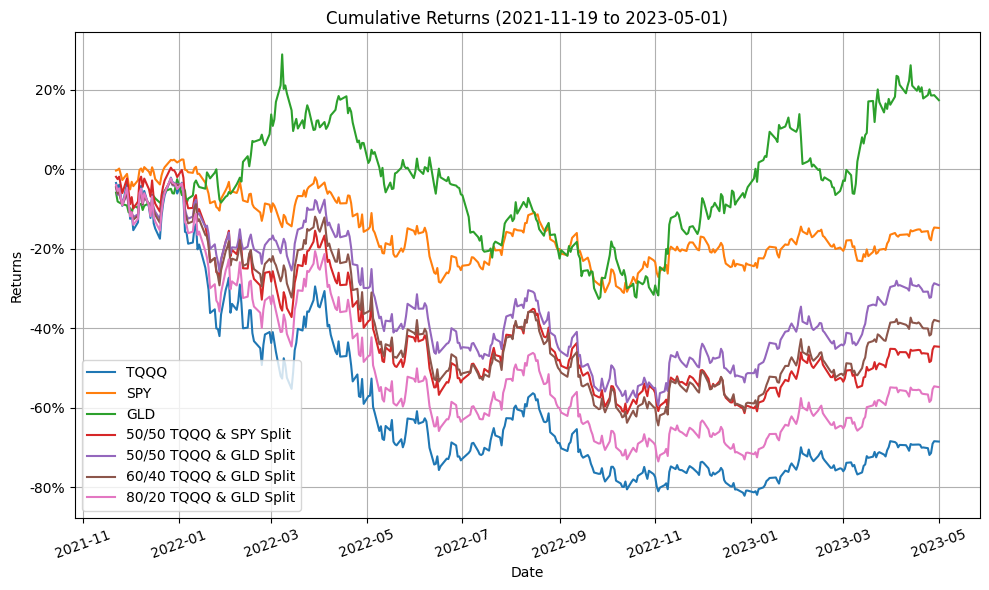

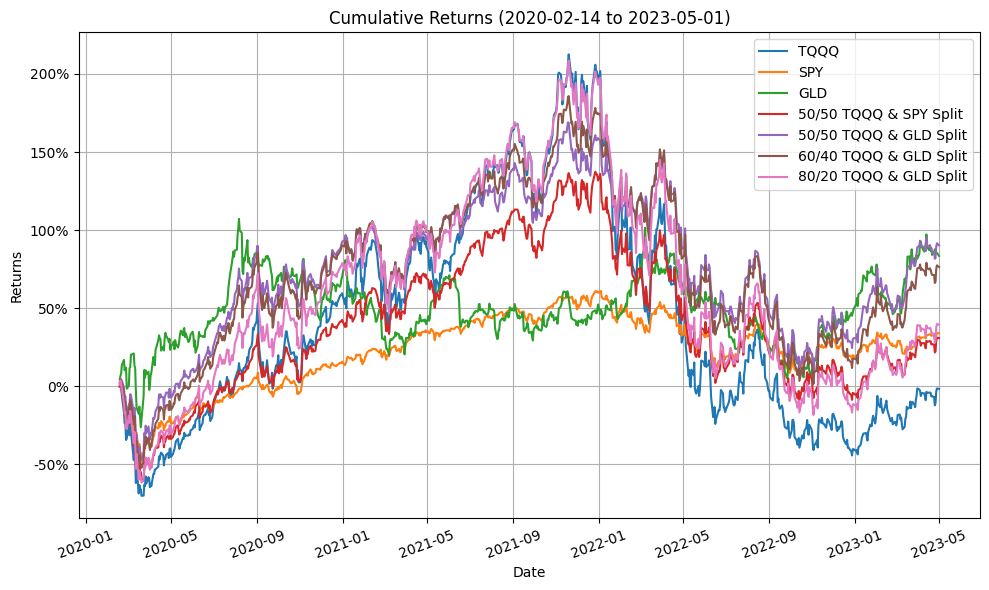

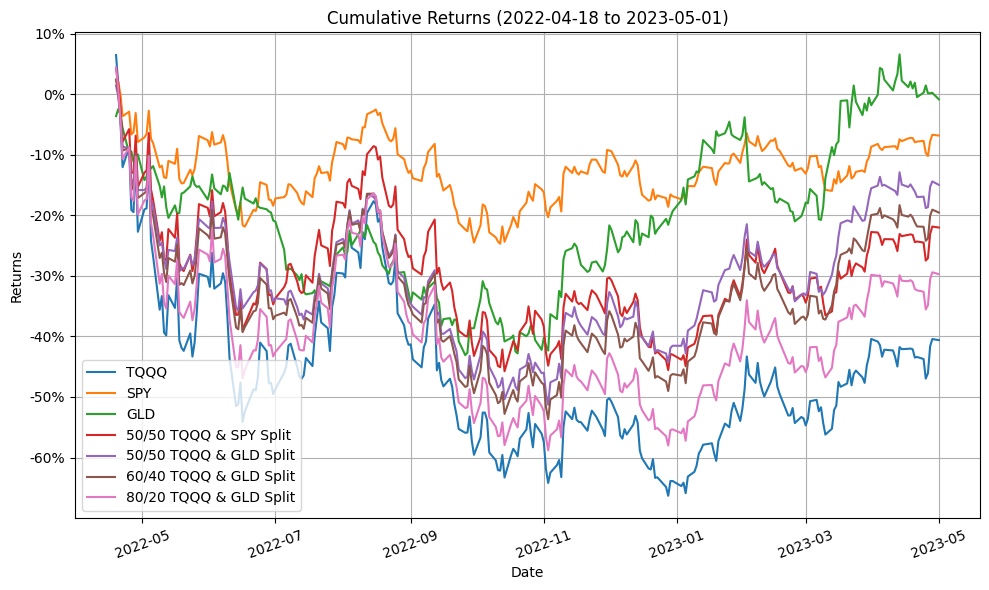

In [ ]:
# Plotting the return % for each ETF and associated splits starting at those same 3 dates to current
for i in range(len(dfs)):
  plt.figure(figsize=(10, 6))
  plt.plot(cumulative_returns_list[i]['TQQQ'], label='TQQQ')
  plt.plot(cumulative_returns_list[i]['SPY'], label='SPY')
  plt.plot(cumulative_returns_list[i]['GLD'], label='GLD')
  plt.plot(cumulative_returns_list[i]['SPY_Split5050'], label='50/50 TQQQ & SPY Split')
  plt.plot(cumulative_returns_list[i]['GLD_Split5050'], label='50/50 TQQQ & GLD Split')
  plt.plot(cumulative_returns_list[i]['GLD_Split6040'], label='60/40 TQQQ & GLD Split')
  plt.plot(cumulative_returns_list[i]['GLD_Split8020'], label='80/20 TQQQ & GLD Split')

  plt.plot()
  plt.legend()
  plt.xlabel('Date')
  plt.xticks(rotation=20)
  plt.ylabel('Returns')
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
  plt.title(f'Cumulative Returns ({cumulative_returns_list[i].index[0].strftime("%Y-%m-%d")} to {cumulative_returns_list[i].index[-1].strftime("%Y-%m-%d")})')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
def calculate_cagr(df):
    # Getting the prices on the same price level so we can correctly calculate cagr(Essiently prices split portfolio start at the same price and then are free)
    prices = df[['TQQQ', 'SPY', 'GLD']].copy()
    prices['SPY_adj'] = prices['SPY'] / prices['SPY'].iloc[0] * prices['TQQQ'].iloc[0]
    prices['GLD_adj'] = prices['GLD'] / prices['GLD'].iloc[0] * prices['TQQQ'].iloc[0]

    # Getting the prices for the portfolio splits
    prices['SPY_Split5050'] = prices['TQQQ'] * 0.5 + prices['SPY_adj'] * 0.5
    prices['GLD_Split5050'] = prices['TQQQ'] * 0.5 + prices['GLD_adj'] * 0.5
    prices['GLD_Split6040'] = prices['TQQQ'] * 0.6 + prices['GLD_adj'] * 0.4
    prices['GLD_Split8020'] = prices['TQQQ'] * 0.8 + prices['GLD_adj'] * 0.2

    # total time for cagr
    years = (prices.index[-1] - prices.index[0]).days / 365
    prices_selected = prices[['TQQQ', 'SPY', 'GLD', 'SPY_Split5050', 'GLD_Split5050', 'GLD_Split6040', 'GLD_Split8020']]
    #compound annual growth rate(cagr) formula
    cagr = (prices_selected.iloc[-1, :] / prices_selected.iloc[0, :]) ** (1 / years) - 1
    return cagr.apply(lambda x: f'{x:.2%}')

In [ ]:
# Print CAGR (Compound Annual Growth Rate) from the 3 dates to current 
print("CAGR for TQQ's All Time High - Current Date")
print(calculate_cagr(df_ATH))
print("----------------------------------------------")
print("CAGR for Start of Covid COVID - Current Date")
print(calculate_cagr(df_COVID))
print("----------------------------------------------")
print("CAGR for a Year Ago - Current Date")
print(calculate_cagr(df_1y))

CAGR for TQQ's All Time High - Current Date
TQQQ             -55.03%
SPY              -10.48%
GLD               11.69%
SPY_Split5050    -31.10%
GLD_Split5050    -18.48%
GLD_Split6040    -25.11%
GLD_Split8020    -39.23%
dtype: object
----------------------------------------------
CAGR for Start of Covid COVID - Current Date
TQQQ             -0.52%
SPY               9.53%
GLD              20.81%
SPY_Split5050     4.77%
GLD_Split5050    11.28%
GLD_Split6040     9.14%
GLD_Split8020     4.56%
dtype: object
----------------------------------------------
CAGR for a Year Ago - Current Date
TQQQ             -39.53%
SPY               -6.58%
GLD               -0.80%
SPY_Split5050    -22.99%
GLD_Split5050    -20.08%
GLD_Split6040    -23.95%
GLD_Split8020    -31.72%
dtype: object


### Simulating 100 Random Intervals For Backtesting

In [ ]:
# Creating Interval Bounds
start_date = datetime.date(2010, 2, 11)
end_date = date.today()

# Create 100 Date Intervals
intervals = []
for i in range(100):
    days = random.randint(30, 365*10)
    delta = datetime.timedelta(days=days)
    interval_start = random_date = start_date + delta
    interval_end = interval_start + datetime.timedelta(days=365)
    if interval_end > end_date:
        interval_end = end_date
    intervals.append((interval_start, interval_end))

In [ ]:
RandDFs = []
for i in range(len(intervals)):
  RandTest = yf.download(tickers, start=intervals[i][0], end=intervals[i][1])['Close']
  RandDFs.append(RandTest)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%********

In [ ]:
# Creating a Dictonary for the Portfolios i'm intrested in
cagr_dict = {'TQQQ': [], 'SPY': [], 'GLD': [], 'SPY_Split5050': [], 'GLD_Split5050': [], 'GLD_Split6040': [], 'GLD_Split8020': []}

for df in RandDFs:
    # Calling the function I made a while ago
    cagrs = calculate_cagr(df)
    for asset in cagr_dict:
        # converting from a string to float as I outputed in percentages for my function
        cagr = float(cagrs[asset][:-1]) / 100
        cagr_dict[asset].append(cagr)

In [ ]:
mean_cagrs = pd.DataFrame.from_dict(cagr_dict).mean()
mean_cagrs = (mean_cagrs * 100).round(2).astype(str) + '%'
print(mean_cagrs)

TQQQ             57.48%
SPY              11.53%
GLD               2.69%
SPY_Split5050    34.49%
GLD_Split5050    30.06%
GLD_Split6040    35.54%
GLD_Split8020    46.51%
dtype: object
